In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [4]:
bike_rack = gpd.read_file('../data/Bike Racks (GIS).geojson')
print(bike_rack.crs)
bike_rack.head( )

epsg:4326


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [5]:
type(bike_rack)

geopandas.geodataframe.GeoDataFrame

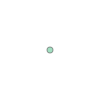

In [6]:
bike_rack.loc[0, 'geometry']

In [7]:
print(bike_rack.loc[0, 'geometry'])

POINT (-86.65545277788499 36.049927777764)


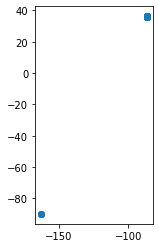

In [8]:
bike_rack.plot();

In [9]:
bus_stops = pd.read_csv('../data/WeGo_Transit_Bus_Stops (1).csv')
print(bus_stops.shape)
bus_stops.head(3)

(2578, 10)


,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,location,lat,lng
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,"(36.236249, -86.816722)",36.236249,-86.816722
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,"(36.142642, -86.780897)",36.142642,-86.780897
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,"(36.105615, -86.672004)",36.105615,-86.672004


In [10]:
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stop ID            2578 non-null   int64  
 1   Stop Abbreviation  2578 non-null   object 
 2   Stop Name          2578 non-null   object 
 3   Shelter?           2578 non-null   bool   
 4   Bench?             2578 non-null   bool   
 5   Route Numbers      2555 non-null   object 
 6   Route Name         2578 non-null   object 
 7   location           2524 non-null   object 
 8   lat                2524 non-null   float64
 9   lng                2524 non-null   float64
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 166.3+ KB


In [11]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
bus_stops.head(3)

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,location,lat,lng,geometry
0,5120,7AVUNINN,7TH AVE & UNION ST NB,False,False,NaN,AIRPORT - DOWNTOWN HOTELS,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,5455,CM5_4,Temporary Bay 4,False,False,NaN,HERMAN,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,2762,23ACLASF,23RD AVE N & CLARKSVILLE PIKE SB,False,False,22,BORDEAUX,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


In [12]:
bike_rack.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = bike_rack.crs, 
                           geometry = bus_stops['geometry'])

In [14]:
type(bus_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
markers = [['detail_loc', 'location', 'geometry']]

In [17]:
stops_by_bike = gpd.sjoin(bus_geo, bike_rack, op = 'within')

In [18]:
stops_by_bike.head()

,Stop ID,Stop Abbreviation,Stop Name,Shelter?,Bench?,Route Numbers,Route Name,location_left,lat_left,lng,...,location_right,domain,idnumber,objectid,status,lon,type,data_colle,lat_right,capacity


In [19]:
stops_by_bike['detail_loc'].value_counts()

Series([], Name: detail_loc, dtype: int64)

In [22]:
stops_in_Morgan_Park = stops_by_bike.loc[stops_by_bike['detail_loc'] == 'Morgan Park']
stops_in_Morgan_Park.shape

(0, 24)

In [23]:
polygon_Morgan_Park = bike_rack.loc[bike_rack['detail_loc'] == 'Morgan Park']
polygon_Morgan_Park.shape

(3, 13)

In [24]:
ax = polygon_Morgan_Park.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_Morgan_Park.plot( ax = ax, column = 'route');
plt.show();

C:\Users\natha\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

<Figure size 576x720 with 1 Axes>